<a href="https://colab.research.google.com/github/praseedm/PGMP/blob/main/Interpolation_samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.youtube.com/watch?v=eI1wjDGlics
# https://github.com/jvdkwast/PCRasterTutorials/tree/main/GroundwaterInterpolation/Data

In [2]:
import pandas as pd

In [3]:
fp = './t.txt'

In [6]:
df = pd.read_csv("./t.txt", header=None, delim_whitespace=True)

In [7]:
df.to_csv('t.csv', index=None)

In [9]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 64.1 MB/s eta 0:00:00


In [10]:
import pandas as pd
import geopandas as gpd
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

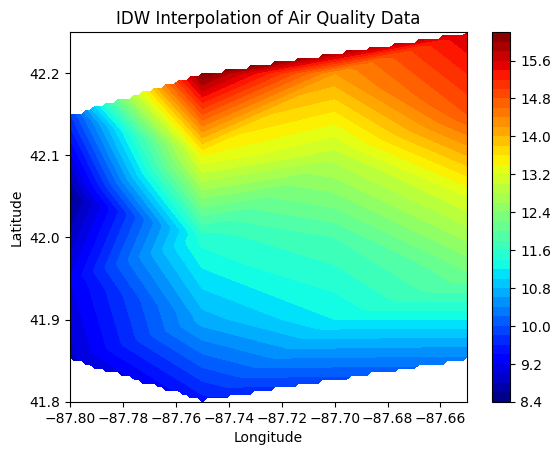

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# load data from the CSV file
data = pd.read_csv('temp_pm_data.csv')

# define the limits and spacing of the grid
x = np.linspace(data['Longitude'].min(), data['Longitude'].max(), 100)
y = np.linspace(data['Latitude'].min(), data['Latitude'].max(), 100)

# create the grid
X, Y = np.meshgrid(x, y)

# perform IDW interpolation
Z = griddata((data['Longitude'], data['Latitude']), data['PM2.5 Concentration'], (X, Y), method='linear')

# create a filled contour plot
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.colorbar()

# add title and labels
plt.title('IDW Interpolation of Air Quality Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()


## Ordinary Krigging

In [26]:
!!pip install pykrige

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting pykrige',
 '  Downloading PyKrige-1.7.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (860 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/860.5 KB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b860.5/860.5 KB\x1b \x1b36.8 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hRequirement already satisfied: numpy<2,>=1.14.5 in /usr/local/lib/python3.9/dist-packages (from pykrige) (1.22.4)',
 'Requirement already satisfied: scipy<2,>=1.1.0 in /usr/local/lib/python3.9/dist-packages (from pykrige) (1.10.1)',
 'Installing collected packages: pykrige',
 'Successfully installed pykrige-1.7.0']

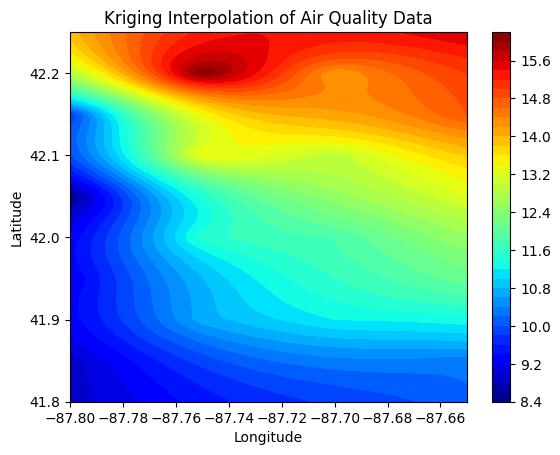

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging

# load data from the CSV file
data = pd.read_csv('temp_pm_data.csv')

# define the limits and spacing of the grid
x = np.linspace(data['Longitude'].min(), data['Longitude'].max(), 100)
y = np.linspace(data['Latitude'].min(), data['Latitude'].max(), 100)

# create the grid
X, Y = np.meshgrid(x, y)

# perform kriging interpolation
OK = OrdinaryKriging(data['Longitude'], data['Latitude'], data['PM2.5 Concentration'], variogram_model='linear', verbose=False, enable_plotting=False)
Z, _ = OK.execute('grid', x, y)

# create a filled contour plot
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.colorbar()

# add title and labels
plt.title('Kriging Interpolation of Air Quality Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()


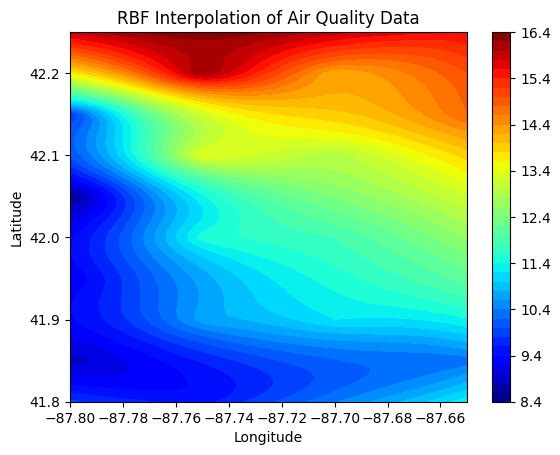

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

# load data from the CSV file
data = pd.read_csv('temp_pm_data.csv')

# define the limits and spacing of the grid
x = np.linspace(data['Longitude'].min(), data['Longitude'].max(), 100)
y = np.linspace(data['Latitude'].min(), data['Latitude'].max(), 100)

# create the grid
X, Y = np.meshgrid(x, y)

# perform RBF interpolation
rbf = Rbf(data['Longitude'], data['Latitude'], data['PM2.5 Concentration'], function='linear')
Z = rbf(X, Y)

# create a filled contour plot
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.colorbar()

# add title and labels
plt.title('RBF Interpolation of Air Quality Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()
